# Đọc dữ liệu và hiển thị các giá trị sau:

In [20]:
import pandas as pd
df = pd.read_excel('abalone.data.xlsx', sheet_name=1, header=None)
df

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## a.Kích thước và số chiều của tập dữ liệu

In [21]:
print(f'Kích thước của tập dữ liệu : {df.shape[0]}')
print(f'Số chiều của tập dữ liệu : {df.shape[1]}')

Kích thước của tập dữ liệu : 4177
Số chiều của tập dữ liệu : 9


## b.Số giá trị nhãn

In [22]:
df = df[df[0].notna()]
print(f'Số lượng nhãn : {len(df[0].unique())}')
print(f'Các nhãn trong tập dữ liệu : {df[0].unique()}')
print(f'Số giá trị của mỗi nhãn : \n{df[0].value_counts(dropna=True)}')

Số lượng nhãn : 3
Các nhãn trong tập dữ liệu : ['M' 'F' 'I']
Số giá trị của mỗi nhãn : 
0
M    1528
I    1342
F    1307
Name: count, dtype: int64


## c.Giá trị trung bình, max, min, mean của các thuộc tính có giá trị số (trình bày theo thứ tự sắp xếp các cột)

In [23]:
df[0] = df[0].map({'M' : 0, 'F' : 1, 'I' : 2})
print(f'Giá trị trung bình : \n{df.mean()}')
print(f'Giá trị lớn nhất : \n{df.max()}')
print(f'Giá trị nhỏ nhất : \n{df.min()}')

Giá trị trung bình : 
0    0.955470
1    0.523992
2    0.407881
3    0.139516
4    0.828742
5    0.359367
6    0.180594
7    0.238831
8    9.933684
dtype: float64
Giá trị lớn nhất : 
0     2.0000
1     0.8150
2     0.6500
3     1.1300
4     2.8255
5     1.4880
6     0.7600
7     1.0050
8    29.0000
dtype: float64
Giá trị nhỏ nhất : 
0    0.0000
1    0.0750
2    0.0550
3    0.0000
4    0.0020
5    0.0010
6    0.0005
7    0.0015
8    1.0000
dtype: float64


In [24]:
df.describe()

,0,1,2,3,4,5,6,7,8
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# 2.Thu giảm số chiều và hiển thị các điểm dữ liệu trên không gian 2 chiều, phân biệt nhãn qua các màu khác nhau

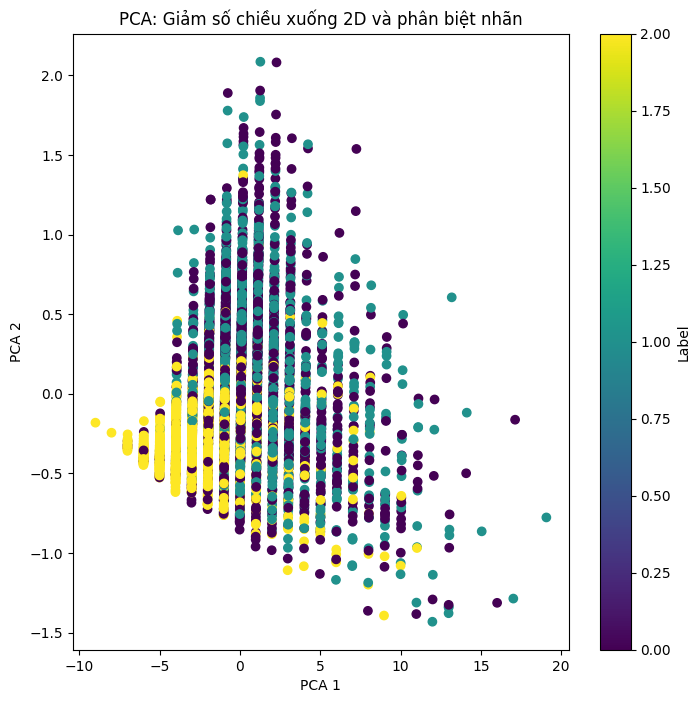

In [25]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_df = pca.fit_transform(df.drop(columns=[0]))

plt.figure(figsize=(8,8))
scatter = plt.scatter(pca_df[:, 0], pca_df[:, 1], c=df[0], cmap='viridis')

# Thêm chú thích màu sắc
plt.colorbar(scatter, label='Label')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA: Giảm số chiều xuống 2D và phân biệt nhãn')

# Hiển thị biểu đồ
plt.show()

# 3.Chia dữ liệu thành 2 phần theo tỷ lệ 75/ 25, dùng 3 mô hình phân lớp khác nhau, độ đo đánh giá là Accuracy và F-Score. Trình bày kết quả trên một đồ thị bar chart

In [37]:
df[0].value_counts()

0
0    1528
2    1342
1    1307
Name: count, dtype: int64

In [26]:
# loại bỏ cột chứa label
df_train = df.drop(df.columns[0], axis=1)
df_train

,1,2,3,4,5,6,7,8
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train, df[0], train_size=0.75, test_size=0.25, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

names = ['Support Vector Machines', 'Logistic Regression', 'Random Forest']
accuracy_scores = []
f1_scores = []
classifiers = [SVC(kernel='rbf'), LogisticRegression(), RandomForestClassifier()]
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)
for name, clf in zip(names, classifiers):
    clf.fit(X_train_scaler, y_train)
    y_pred = clf.predict(X_test_scaler)
    
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred, average="weighted"))

    print(f'Accuracy of {name} : {accuracy_score(y_test, y_pred)}')
    print(f'F-Score of {name} : {f1_score(y_test, y_pred, average="weighted")}','\n')
    

Accuracy of Support Vector Machines : 0.5751196172248804
F-Score of Support Vector Machines : 0.564765636465587 

Accuracy of Logistic Regression : 0.584688995215311
F-Score of Logistic Regression : 0.5727731898002208 

Accuracy of Random Forest : 0.5607655502392345
F-Score of Random Forest : 0.5598022722322834 



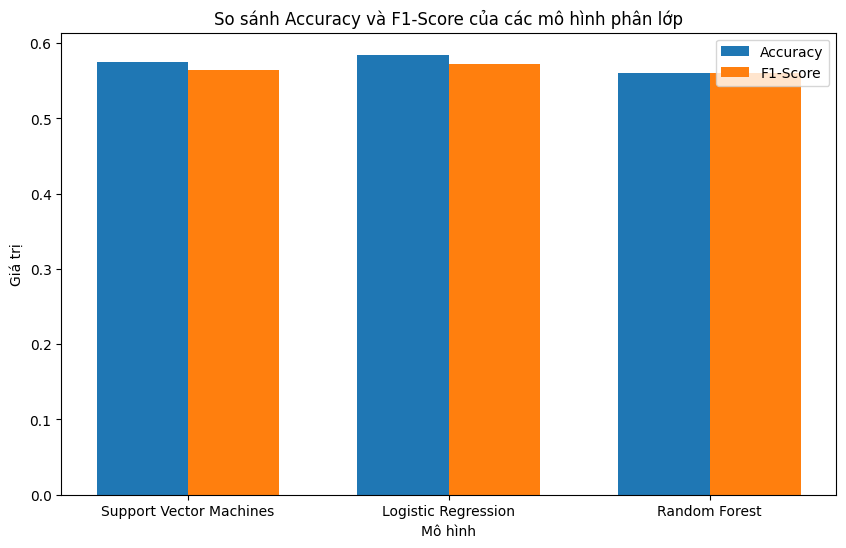

In [36]:
labels = names

x = range(len(labels))
width = 0.35  # chiều rộng của mỗi thanh

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x, accuracy_scores, width, label='Accuracy')
bar2 = ax.bar([p + width for p in x], f1_scores, width, label='F1-Score')

# Thêm nhãn và tiêu đề
ax.set_xlabel('Mô hình')
ax.set_ylabel('Giá trị')
ax.set_title('So sánh Accuracy và F1-Score của các mô hình phân lớp')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

plt.show()

# 4.Gom cụm tập dữ liệu trên các cột còn lại dùng giải thuật K - Means, dùng giá trị để đánh giá kết quả gom cụm

In [66]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [67]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_
colmap = {1: 'r', 2:'g', 3:'b'}

In [68]:
centroids

array([[ 0.66705471,  0.58494761,  0.45894936,  0.15876019,  1.07518859,
         0.46479366,  0.23650698,  0.30742317, 11.24155995],
       [ 1.2477327 ,  0.46224344,  0.35534129,  0.11843675,  0.56947828,
         0.26009642,  0.12420453,  0.15906301,  7.57899761],
       [ 0.63461538,  0.59168956,  0.46924451,  0.17001374,  1.15776099,
         0.43313324,  0.24124176,  0.37419368, 17.31318681]])

In [74]:
df_labels = df[0]
df_labels

0       0
1       0
2       1
3       0
4       2
       ..
4172    1
4173    0
4174    0
4175    1
4176    0
Name: 0, Length: 4177, dtype: int64

Supply a 'c' argument or a 'color' kwarg but not both; they differ but their functionalities overlap.


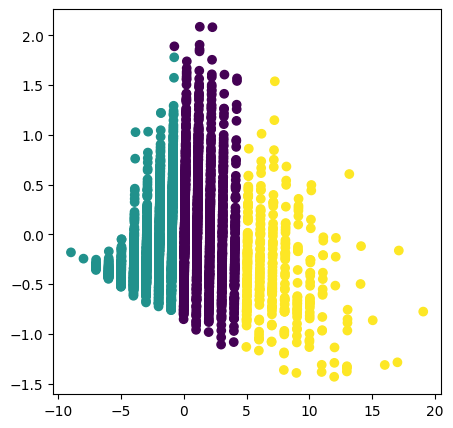

In [85]:
try:
    fig = plt.figure(figsize=(5,5))

    colors = list(map(lambda x: colmap[x+1], labels))

    scatter = plt.scatter(pca_df[:,0], pca_df[:, 1], c=labels, cmap='viridis')

    for idx, centroid in enumerate(centroids):
        plt.scatter(*centroid, color=colmap[idx+1])

    plt.xlim(0,80)
    plt.ylim(0, 80) 
    plt.show()
except Exception as e:
    print(e)